In [1]:
import tensorflow as tf

from tensorflow import keras
from keras import layers

from script import *

In [2]:
basePath = "D:\\Desktop\\CAB320\\small_flower_dataset\\"
x, y, labels = load_data(basePath)

In [3]:
train_X = x[:750]
train_y = y[:750]

test_X = x[750:]
test_y = y[750:]

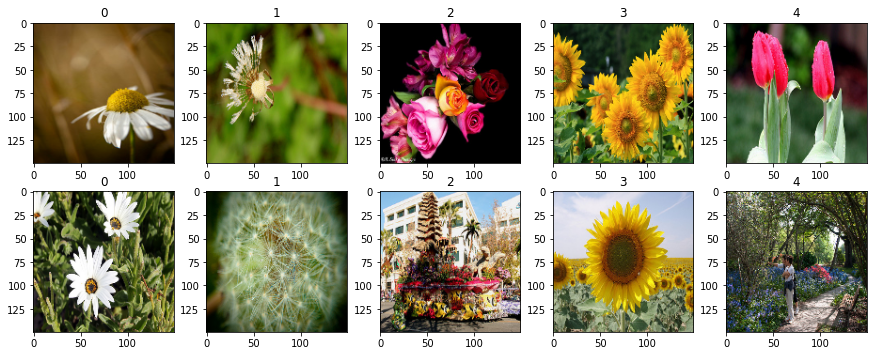

In [4]:
plot_images(x, y)

In [12]:
dim1, dim2 = 150, 150

img_dim = (dim1, dim2, 3)

model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=img_dim,
    alpha=1.0, # control width of network layers (less than 1.0 means decreases no. filters, more than 1.0 means increases no. filters)
    include_top=True, # include fully connected layer
    weights=None, # no image weights
    input_tensor=None, # none
    pooling=None, # maybe we can edit this?
    classifier_activation='softmax' # default
)

In [13]:
model.summary()

Model: "mobilenetv2_1.00_150"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][

In [20]:
model_popped = model.layers[-1].output

outputs = layers.Dense(5)(model_popped)
new_model = keras.Model(inputs=model.input, outputs=outputs)

new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][0]']         

In [21]:
initial_learning_rate = 0.01 # learning rate they want

optimizer = tf.keras.optimizers.SGD(
    learning_rate=initial_learning_rate, 
    momentum=0.0,
    nesterov=False, 
    name="SGD"
)

In [22]:
new_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer=optimizer,
            metrics=['accuracy'])

In [23]:
history = new_model.fit(train_X, train_y,
                    batch_size=10,
                    epochs=70,
                    validation_split=0.2,
                    validation_batch_size=10
                    )

Epoch 1/70
60/60 [==============================] - 15s 220ms/step - loss: 1.6132 - accuracy: 0.1950 - val_loss: 1.6106 - val_accuracy: 0.2000
Epoch 2/70
60/60 [==============================] - ETA: 0s - loss: 1.5998 - accuracy: 0.2783

In [ ]:
def eval_model(model, x_train, y_train, x_test, y_test, history):
    fig = plt.figure(figsize=[21, 6])
    ax = fig.add_subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    ax.legend()
    ax.set_title('Training Performance')

    
    ax = fig.add_subplot(1, 3, 2)
    pred = model.predict(x_train);
    indexes = tf.argmax(pred, axis=1)
    cm = confusion_matrix(y_train, indexes)
    c = ConfusionMatrixDisplay(cm, display_labels=range(10))
    c.plot(ax = ax)
    ax.set_title('Training Set Performance: %1.3f' % (sum(indexes.numpy() == y_train)/len(y_train)));
    
    ax = fig.add_subplot(1, 3, 3)

    time_1 = process_time()
    pred = model.predict(x_test);
    time_2 = process_time()
    print('Time (inference):   %f seconds' % (time_2 - time_1))

    indexes = tf.argmax(pred, axis=1)
    cm = confusion_matrix(y_test, indexes)
    c = ConfusionMatrixDisplay(cm, display_labels=range(10))
    c.plot(ax = ax)    
    ax.set_title('Testing Set Performance: %1.3f' % (sum(indexes.numpy() == y_test)/len(y_test)));

    print(classification_report(y_test, indexes))

In [ ]:
eval_model(new_model, train_X, train_y, test_X, test_y, history)